In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
data = pd.read_csv('dataset.csv')

In [37]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F3C5B37848>,
      dtype=object)

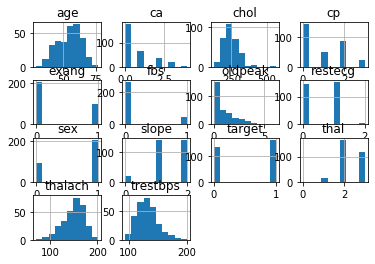

In [91]:
data.hist()

In [38]:
data.isnull().values.any()

False

In [39]:
data['target'].unique()

array([1, 0], dtype=int64)

In [40]:
print('Total no of rows are {}'.format(len(data)))
for column in data.columns:
    print(column,'has {}'.format(len(data[data[column] == 0])),'zero rows')

Total no of rows are 303
age has 0 zero rows
sex has 96 zero rows
cp has 143 zero rows
trestbps has 0 zero rows
chol has 0 zero rows
fbs has 258 zero rows
restecg has 147 zero rows
thalach has 0 zero rows
exang has 204 zero rows
oldpeak has 99 zero rows
slope has 21 zero rows
ca has 175 zero rows
thal has 2 zero rows
target has 138 zero rows


In [41]:
data.shape

(303, 14)

In [92]:
dataset = pd.get_dummies(data, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [94]:
dataset.head()

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0  0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1 -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2 -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3  0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
4  0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   

   cp_0  cp_1  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  \
0     0     0  ...        0     1     0     0     0     0       0       1   
1     0     0  ...        0     1     0     0     0     0       0       0   
2     0     1  ...        1     1     0     0     0     0       0       0   
3     0     1  ...        1     1     0     0     0     0       0       0   
4     1     0  ...        1     1     0     0     0     0       0       0   

   thal_2  thal_3  
0       0       0  
1       1       0  
2       1       0  
3       1       0  
4       1       0  

[5 rows x 31 columns]

In [95]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)

In [97]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [98]:
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

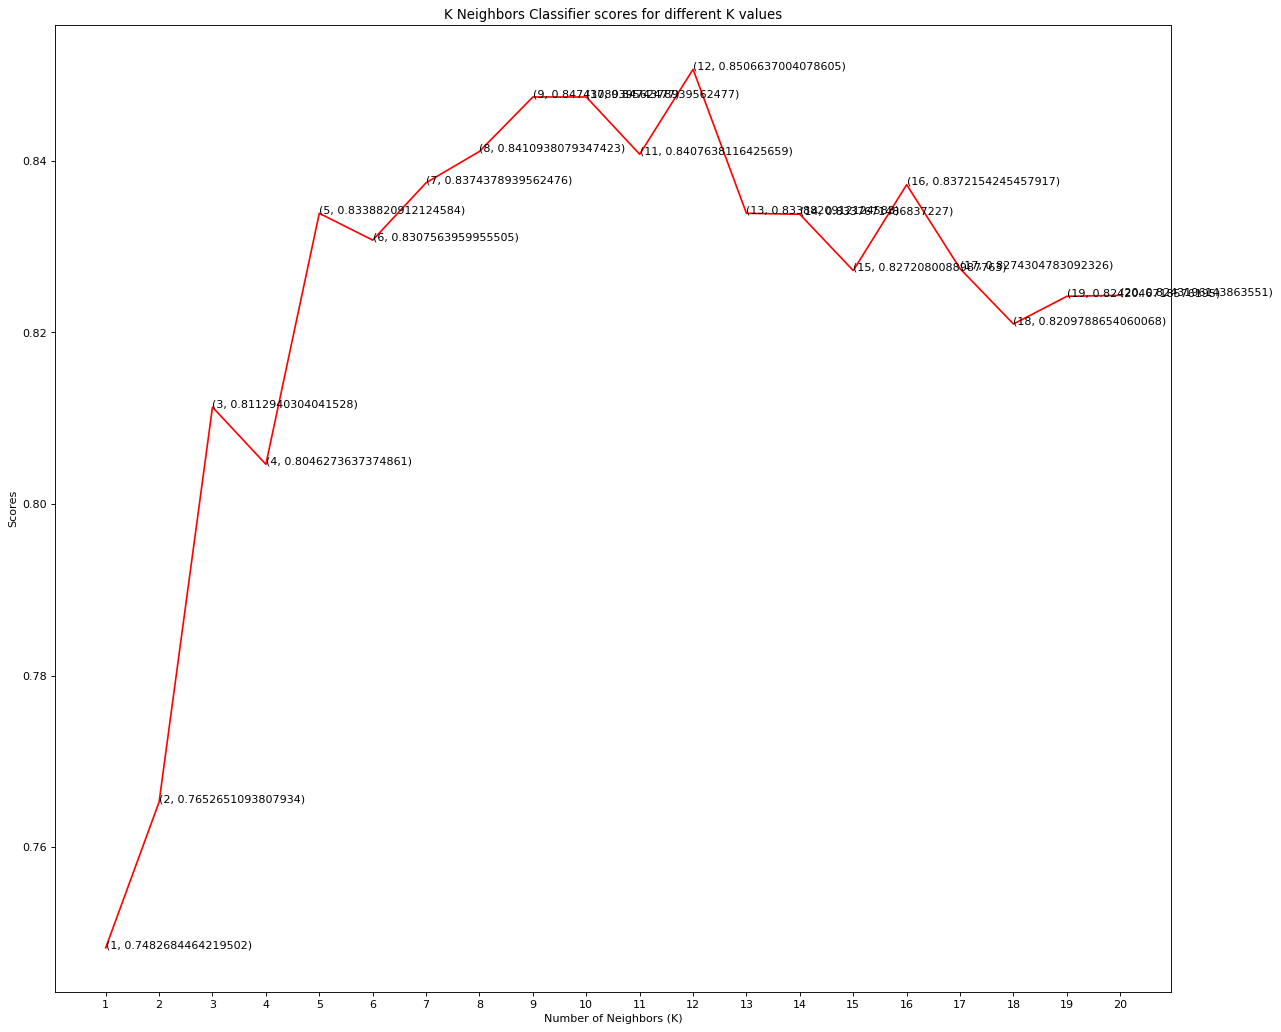

In [104]:
plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [105]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)

In [106]:
score.mean()

0.8506637004078605

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [113]:
score.mean()

0.8041898405635891

In [132]:
# Trying to explore more 
# The code below is just for experimental purpose 
# Above code and model is the useful one try to use that 

In [114]:
data.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

In [115]:
useful_cols = ['cp', 'restecg', 'thalach', 'slope']

In [116]:
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [117]:
test_df = pd.get_dummies(data, columns = ['cp', 'restecg', 'slope'])

In [119]:
pd.set_option('display.max_columns', None)

In [120]:
test_df.head()

age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  ca  thal  target  \
0   63    1       145   233    1      150      0      2.3   0     1       1   
1   37    1       130   250    0      187      0      3.5   0     2       1   
2   41    0       130   204    0      172      0      1.4   0     2       1   
3   56    1       120   236    0      178      0      0.8   0     2       1   
4   57    0       120   354    0      163      1      0.6   0     2       1   

   cp_0  cp_1  cp_2  cp_3  restecg_0  restecg_1  restecg_2  slope_0  slope_1  \
0     0     0     0     1          1          0          0        1        0   
1     0     0     1     0          0          1          0        1        0   
2     0     1     0     0          1          0          0        0        0   
3     0     1     0     0          0          1          0        0        0   
4     1     0     0     0          0          1          0        0        0   

   slope_2  
0        0  
1        0  
2        1  
3        1  
4        1

In [122]:
test_df.drop(['age', 'sex', 'trestbps', 'chol', 'fbs', 'exang', 'oldpeak', 'ca', 'thal'],axis = 1, inplace = True)

In [123]:
test_df

thalach  target  cp_0  cp_1  cp_2  cp_3  restecg_0  restecg_1  restecg_2  \
0        150       1     0     0     0     1          1          0          0   
1        187       1     0     0     1     0          0          1          0   
2        172       1     0     1     0     0          1          0          0   
3        178       1     0     1     0     0          0          1          0   
4        163       1     1     0     0     0          0          1          0   
..       ...     ...   ...   ...   ...   ...        ...        ...        ...   
298      123       0     1     0     0     0          0          1          0   
299      132       0     0     0     0     1          0          1          0   
300      141       0     1     0     0     0          0          1          0   
301      115       0     1     0     0     0          0          1          0   
302      174       0     0     1     0     0          1          0          0   

     slope_0  slope_1  slope_2  
0          1        0        0  
1          1        0        0  
2          0        0        1  
3          0        0        1  
4          0        0        1  
..       ...      ...      ...  
298        0        1        0  
299        0        1        0  
300        0        1        0  
301        0        1        0  
302        0        1        0  

[303 rows x 12 columns]

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['thalach']
test_df[columns_to_scale] = standardScaler.fit_transform(test_df[columns_to_scale])

In [125]:
test_df

thalach  target  cp_0  cp_1  cp_2  cp_3  restecg_0  restecg_1  \
0    0.015443       1     0     0     0     1          1          0   
1    1.633471       1     0     0     1     0          0          1   
2    0.977514       1     0     1     0     0          1          0   
3    1.239897       1     0     1     0     0          0          1   
4    0.583939       1     1     0     0     0          0          1   
..        ...     ...   ...   ...   ...   ...        ...        ...   
298 -1.165281       0     1     0     0     0          0          1   
299 -0.771706       0     0     0     0     1          0          1   
300 -0.378132       0     1     0     0     0          0          1   
301 -1.515125       0     1     0     0     0          0          1   
302  1.064975       0     0     1     0     0          1          0   

     restecg_2  slope_0  slope_1  slope_2  
0            0        1        0        0  
1            0        1        0        0  
2            0        0        0        1  
3            0        0        0        1  
4            0        0        0        1  
..         ...      ...      ...      ...  
298          0        0        1        0  
299          0        0        1        0  
300          0        0        1        0  
301          0        0        1        0  
302          0        0        1        0  

[303 rows x 12 columns]

In [126]:
y = test_df['target']
X = test_df.drop(['target'], axis = 1)

In [129]:
from sklearn.linear_model import LogisticRegression

In [127]:
randomforest_classifier= RandomForestClassifier(n_estimators=10)

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [128]:
score.mean()

0.6860808305524657

In [130]:
log_classifier = LogisticRegression()

score=cross_val_score(randomforest_classifier,X,y,cv=10)

In [131]:
score.mean()

0.6766332962550983